# Chapter 10: Quantum Tests

---

**Prerequisites:**
- See `Chapter02_QuantumSoftware.ipynb` for installation instructions


In [1]:
# Setup and imports
import numpy as np
import matplotlib.pyplot as plt

# Add utilities to path
from qiskit import QuantumCircuit
from IPython.display import display
from qiskit.quantum_info import Statevector, Operator
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import UnitaryGate
from qiskit.circuit.library.standard_gates.u import UGate
from qiskit_aer import Aer

from Chapter08_QuantumGates_functions import (simulate_statevector, simulate_measurements, runCircuitOnIBMQuantum, 
                                              analyzeCircuitForHardware, plot_measurement_results)

from Chapter10_QuantumTests_functions import (ryMatrix, rzMatrix,hadamards,innerProductEstimation, woodbury_rank1_query)
print('Setup complete!')

Setup complete!


##  Hadamard Test

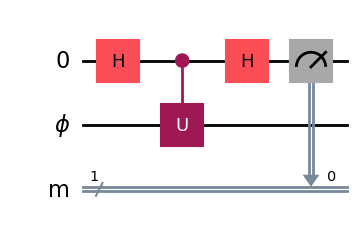

Counts: {'0': 846, '1': 154}


In [2]:
zeroQubit = QuantumRegister(1, '0')
phiQubit = QuantumRegister(1, '\u03D5')
cl = ClassicalRegister(1,'m')
circuit = QuantumCircuit(zeroQubit,phiQubit, cl) 
circuit.h(0)
#circuit.sdg(0)
UMatrix = 1/np.sqrt(2)*np.array([[1,1],[1j,-1j]]) 
U = UnitaryGate(UMatrix,'U')
UControl = U.control(1)
circuit.append(UControl,[0,1])
circuit.h(0)
circuit.measure(0,0) 
display(circuit.draw('mpl'))
counts = simulate_measurements(circuit,shots = 1000)
print('Counts:',counts)

## Inner Product

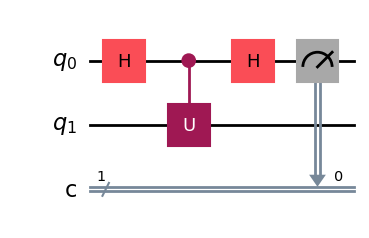

Counts: {'0': 100}


In [3]:
circuit = QuantumCircuit(2, 1) 
circuit.h(0)
a = np.sqrt(3)
b = 1/np.sqrt(2)
UMatrix = b*np.array([[(a+1)/2,(a-1)/2],[(a-1)/2,(-a-1)/2]])
U = UnitaryGate(UMatrix,'U')
UControl = U.control(1)
circuit.append(UControl,[0,1])
circuit.h(0)
circuit.measure(0,0) 
display(circuit.draw('mpl'))
counts = simulate_measurements(circuit,shots = 100)
print('Counts:',counts)

## Inner Product Real

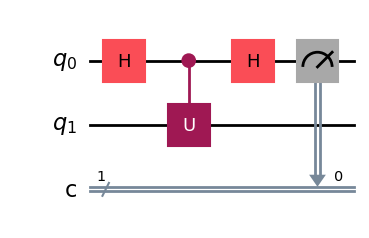

dotprod: 0.8604


In [4]:
U_phi = ryMatrix(2*np.pi/3)
U_psi = ryMatrix(np.pi/3)
UMatrix = np.matmul(U_phi.conj().T,U_psi)

circuit = QuantumCircuit(2, 1) 
circuit.h(0)
U = UnitaryGate(UMatrix,'U')
UControl = U.control(1)
circuit.append(UControl,[0,1])
circuit.h(0)
circuit.measure(0,0) 
display(circuit.draw('mpl'))
shots = 10000
counts = simulate_measurements(circuit,shots =shots)

dotprod = 2*counts['0']/shots - 1
print('dotprod:',dotprod)

## Controlled Swap: Inner product

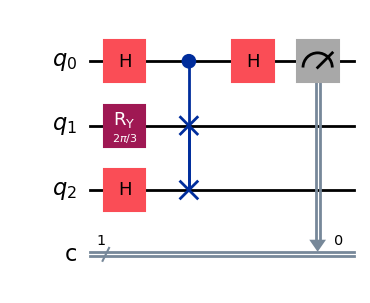

Counts: {'0': 9670, '1': 330}
dotprodSqr: 0.9339999999999999


In [5]:
circuit = QuantumCircuit(3,1) 
circuit.h(0)
circuit.ry(2*np.pi/3, 1)
circuit.h(2)
circuit.cswap(0, 1, 2)
circuit.h(0)
circuit.measure(0,0) 
display(circuit.draw('mpl')) 
counts = simulate_measurements(circuit,10000)
print('Counts:',counts)

P0 = (counts['0'])/10000
print('dotprodSqr:',2*P0-1)

## N-Dimensional Inner Product

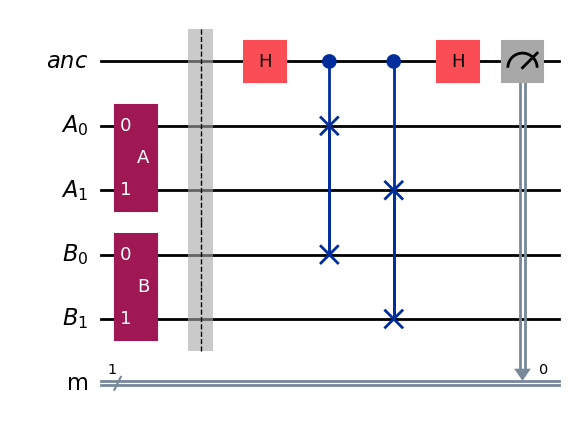

Exact dot product: 0.8371940866813806
Quantum dot product: 0.834386001800126


In [6]:
m = 2 # number of qubits in each register
N = 2**m # Number of elements in the vector (2^m)
u_A = np.random.rand(N) # Example: Displacement vector A
u_B = u_A  + 5*np.random.rand(N) # Example: Displacement vector B

u_A = u_A / np.linalg.norm(u_A)
u_B = u_B / np.linalg.norm(u_B)

quantum_dotprod, circuit = innerProductEstimation(u_A, u_B, shots = 10000)
display(circuit.draw('mpl'))
classical_dotprod= np.abs(np.dot(u_A, u_B))
print('Exact dot product:',classical_dotprod)
print('Quantum dot product:',quantum_dotprod)


## Woodbury equation
A demo from the paper " A near-term quantum algorithm for solving linear systems of equations based on the woodbury identity", O'Malley, et. al, 2022. arXiv preprint arXiv:2205.00645.

In [7]:
# Problem: (I + u*v^T)x = b, compute <z|x>
n = 3  # 3 qubits = 8-dimensional vectors

z_prep = hadamards(n)  # Query vector |z>
b_prep = hadamards(n)  # RHS |b>
v_prep = hadamards(n)  # Update |v>
u_prep = hadamards(n)  # Update |u>

# Woodbury parameters
alpha = 1.0
beta = 1.0

# Run quantum algorithm
result = woodbury_rank1_query(
    z_prep, b_prep, v_prep, u_prep, 
    alpha, beta, 
    shots=10
)

print(f"Quantum result: {result:.4f}")
print(f"Expected (analytical): 0.5000")  # For uniform states

Quantum result: 0.5000
Expected (analytical): 0.5000
